Shape: (20, 11)

Columns: Index(['Attribute', 'Mercury', 'Venus', 'Earth', 'Moon', 'Mars', 'Jupiter',
       'Saturn', 'Uranus', 'Neptune', 'Pluto'],
      dtype='object')

First five rows:


,Attribute,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,Mass (10^24kg),0.330,4.87,5.97,0.073,0.642,1898,568,86.8,102,0.0130
1,Diameter (km),4879,12104,12756,3475,6792,142984,120536,51118,49528,2376
2,Density (kg/m^3),5429,5243,5514,3340,3934,1326,687,1270,1638,1850
3,Gravity (m/s^2),3.7,8.9,9.8,1.6,3.7,23.1,9.0,8.7,11.0,0.7
4,Escape Velocity (km/s),4.3,10.4,11.2,2.4,5.0,59.5,35.5,21.3,23.5,1.3



Last five rows:


,Attribute,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
15,Mean Temperature (C),167,464,15,-20,-65,-110,-140,-195,-200,-225
16,Surface Pressure (bars),0,92,1,0,0.01,Unknown,Unknown,Unknown,Unknown,0.00001
17,Number of Moons,0,0,1,0,2,95,274,28,16,5
18,Ring System?,No,No,No,No,No,Yes,Yes,Yes,Yes,No
19,Global Magnetic Field?,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,Unknown


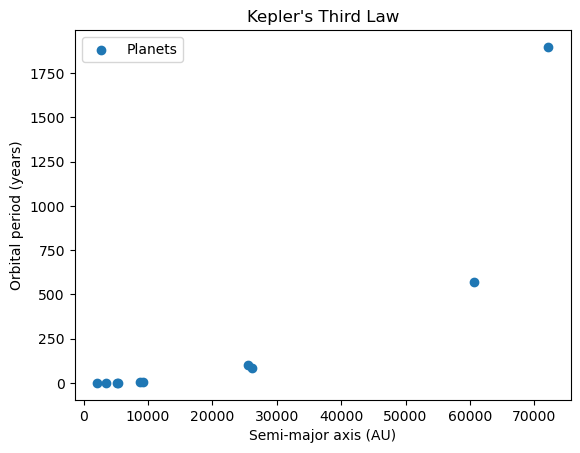

Fit: T = 0.00 * a^(3/2)


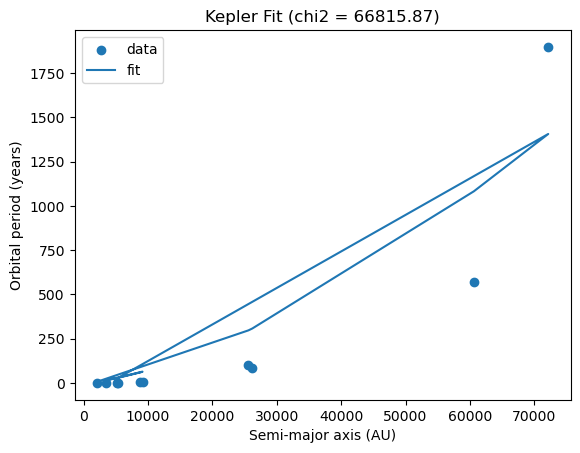

In [1]:
# # Kepler's Third Law

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

df = pd.read_csv("solar_system.csv")
df

# ## Inspect the Data

print("Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nFirst five rows:")
display(df.head())
print("\nLast five rows:")
display(df.tail())

# ## Extract Variables

period = df.iloc[0, 1:].astype(float)
perihelion = df.iloc[1, 1:].astype(float)
aphelion = df.iloc[2, 1:].astype(float)

# Perihelion: closest point to the Sun in a planet's orbit.
# Aphelion: farthest point from the Sun.
# Semi-major axis: half of the longest diameter of the orbit.

# ## Compute Semi-Major Axis

semi_major_axis = (perihelion + aphelion) / 2

new_row = pd.Series(
    ["semi_major_axis"] + semi_major_axis.tolist(),
    index=df.columns
)

df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
df

# ## Scatter Plot

plt.scatter(semi_major_axis, period)
plt.xlabel("Semi-major axis (AU)")
plt.ylabel("Orbital period (years)")
plt.title("Kepler's Third Law")
plt.legend(["Planets"])
plt.show()

# ## Define Kepler Model

def keplers_third_law(a, m):
    return m * a**1.5

popt, pcov = curve_fit(keplers_third_law, semi_major_axis, period)
m_fit = popt[0]

print(f"Fit: T = {m_fit:.2f} * a^(3/2)")

residuals = period - keplers_third_law(semi_major_axis, m_fit)
chi2 = np.sum(residuals**2)
dof = len(period) - 1
chi2_reduced = chi2 / dof
chi2_reduced

# ## Plot with Fit

plt.scatter(semi_major_axis, period, label="data")
plt.plot(semi_major_axis, keplers_third_law(semi_major_axis, m_fit), label="fit")

plt.title(f"Kepler Fit (chi2 = {chi2_reduced:.2f})")
plt.xlabel("Semi-major axis (AU)")
plt.ylabel("Orbital period (years)")
plt.legend()
plt.show()

df.to_csv("kepler.csv", index=False)
